In [1]:

import tensorflow as tf

import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt
from IPython.display import SVG
from sklearn.tree import export_graphviz
tf.debugging.set_log_device_placement(True)


import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow import feature_column
from tensorflow.keras import layers
import tensorflow.compat.v2.feature_column as fc

import re

from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd
import numpy as np
print(tf.__version__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2.0.0
Num GPUs Available:  2


In [3]:
import matplotlib.pyplot as plt # For making plots

import seaborn as sns # Makes beautiful plots
from sklearn.preprocessing import StandardScaler # Testing sklearn
import tensorflow # Imports tensorflow
import keras # Imports keras

Using TensorFlow backend.


In [4]:

from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# 7 in v1.10.0

10.0
7.6


In [5]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10199376641381470405, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9054296982409605734
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5", name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 6614766059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4266931127415481484
 physical_device_desc: "device: 1, name: GeForce RTX 2070, pci bus id: 0000:65:00.0, compute capability: 7.5"]

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline


import datetime, os

from tensorflow.keras.callbacks import TensorBoard

log_dir = 'logs'
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)

from sklearn.model_selection import train_test_split

from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout

[SVM], Logistic; random forrest, naive bayes, XGBoost, [DN

In [7]:
data = pd.read_csv('final_project_mod.csv', dtype = {'Continent': 'category', 'Month':'category', 'DayOfWeek':'category'})

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159912 entries, 0 to 159911
Data columns (total 49 columns):
x0           159912 non-null float64
x1           159912 non-null float64
x3           159912 non-null float64
x4           159912 non-null float64
x5           159912 non-null float64
x6           159912 non-null float64
x7           159912 non-null float64
x8           159912 non-null float64
x9           159912 non-null float64
x10          159912 non-null float64
x11          159912 non-null float64
x12          159912 non-null float64
x13          159912 non-null float64
x14          159912 non-null float64
x15          159912 non-null float64
x16          159912 non-null float64
x17          159912 non-null float64
x18          159912 non-null float64
x19          159912 non-null float64
x20          159912 non-null float64
x21          159912 non-null float64
x22          159912 non-null float64
x23          159912 non-null float64
Continent    159912 non-null category


In [10]:
data.isnull().sum()

x0           0
x1           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
Continent    0
x25          0
x26          0
x27          0
x28          0
Month        0
DayOfWeek    0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
Money        0
x39          0
x40          0
x41          0
x42          0
x43          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
y            0
dtype: int64

In [13]:
# The fist step in ordering a category feature is to define a custom order by way of CategoricalDtype
month_ordered_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Next, the attribute needs to be explicitly re_ordered:
cat_dtype = pd.api.types.CategoricalDtype(categories=month_ordered_categories, ordered=True)
data.Month = data.Month.astype(cat_dtype)

# Repeat steps for DayOfWeek
dayofweek_ordered_categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
cat_dtype = pd.api.types.CategoricalDtype(categories=dayofweek_ordered_categories, ordered=True)
data.DayOfWeek = data.DayOfWeek.astype(cat_dtype)

# Repate Steps for Continent
# Ordering based upon population
continent_ordered_categories = ['Asia', 'America', 'Europe']
cat_dtype = pd.api.types.CategoricalDtype(categories=continent_ordered_categories, ordered=True)
data.Continent = data.Continent.astype(cat_dtype)

In [14]:
data.Month.astype("category").cat.codes.unique()

array([ 6,  7,  5,  4,  8,  3, 10,  9,  2,  1, 11,  0], dtype=int64)

In [15]:
data['Month'].dtypes

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 ordered=True)

In [16]:
data.DayOfWeek.astype("category").cat.codes.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [17]:
data['DayOfWeek'].dtypes

CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], ordered=True)

In [18]:
data.Continent.astype("category").cat.codes.unique()

array([2, 0, 1], dtype=int64)

In [19]:
data['Continent'].dtypes

CategoricalDtype(categories=['Asia', 'America', 'Europe'], ordered=True)

In [20]:
data.isnull().sum()

x0           0
x1           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
Continent    0
x25          0
x26          0
x27          0
x28          0
Month        0
DayOfWeek    0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
Money        0
x39          0
x40          0
x41          0
x42          0
x43          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
y            0
dtype: int64

## separte the features from target

In [21]:
x = data.drop(['y'], axis = 1)

In [22]:
y = data['y']

In [23]:
y = y.to_numpy()

In [24]:
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [25]:
##set one-hot for the category features

In [26]:
x[x.select_dtypes('category').columns].nunique().reset_index(name='cardinality')

,index,cardinality
0,Continent,3
1,Month,12
2,DayOfWeek,5


In [27]:
#ok, about an extra 20 features will come out.  
#will need to put to an array, and then will need to cocatenate

In [28]:
x1 = pd.get_dummies(x,prefix = ['Continent', 'Month', 'DayOfWeek'])

In [29]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159912 entries, 0 to 159911
Data columns (total 65 columns):
x0                   159912 non-null float64
x1                   159912 non-null float64
x3                   159912 non-null float64
x4                   159912 non-null float64
x5                   159912 non-null float64
x6                   159912 non-null float64
x7                   159912 non-null float64
x8                   159912 non-null float64
x9                   159912 non-null float64
x10                  159912 non-null float64
x11                  159912 non-null float64
x12                  159912 non-null float64
x13                  159912 non-null float64
x14                  159912 non-null float64
x15                  159912 non-null float64
x16                  159912 non-null float64
x17                  159912 non-null float64
x18                  159912 non-null float64
x19                  159912 non-null float64
x20                  159912 non-nu

# scale

In [30]:


scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [31]:
from keras.applications import Xception
from keras.utils import multi_gpu_model

In [32]:
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],
                                          cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())

In [37]:
with mirrored_strategy.scope():
    model_final = tf.keras.Sequential()
    model_final.add(layers.Dense(300, input_dim = 65, activation = 'relu'))
    model_final.add(layers.Dropout(0.5))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dropout(0.1))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(300, activation = 'relu'))
    model_final.add(layers.Dense(1, activation = 'sigmoid'))
    
    model_final.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.01, decay = 0.0001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])
    
    log_dir = 'final_logs'
    tb_random = TensorBoard(log_dir=log_dir, histogram_freq=1)

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [38]:
with mirrored_strategy.scope():

    x_train, x_test, y_train, y_test = train_test_split(scaled_train_df.values, y, test_size=0.20, random_state=102)

In [39]:
print(x_train.dtype)

float64


In [40]:
with mirrored_strategy.scope():

    history = model_final.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=1000, callbacks=[tb_random])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Te

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:1
INFO:tensorflow:batch_all_reduce: 12 all-reduces with algorithm = hierarchical_copy, num_packs = 1, agg_small_grads_max_bytes = 0 and agg_small_grads_max_group = 10
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Executing op __inference_initialize_variables_2708 in device /job:localhost/replica:0/task:0/device:GPU:0
INFO:tens

Epoch 41/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4803 - accuracy: 0.7691 - val_loss: 1.0406 - val_accuracy: 0.4162
Epoch 42/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4823 - accuracy: 0.7654 - val_loss: 1.1992 - val_accuracy: 0.4105
Epoch 43/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4829 - accuracy: 0.7658 - val_loss: 1.0445 - val_accuracy: 0.4123
Epoch 44/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4787 - accuracy: 0.7684 - val_loss: 1.1396 - val_accuracy: 0.4071
Epoch 45/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4812 - accuracy: 0.7677 - val_loss: 1.0550 - val_accuracy: 0.4053
Epoch 46/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4784 - accuracy: 0.7695 - val_loss: 1.1611 - val_accuracy: 0.4063
Epoch 47/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.47

Epoch 95/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4640 - accuracy: 0.7784 - val_loss: 1.2222 - val_accuracy: 0.3976
Epoch 96/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4626 - accuracy: 0.7793 - val_loss: 1.3467 - val_accuracy: 0.3971
Epoch 97/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4642 - accuracy: 0.7776 - val_loss: 1.1622 - val_accuracy: 0.3974
Epoch 98/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4609 - accuracy: 0.7795 - val_loss: 1.3570 - val_accuracy: 0.3974
Epoch 99/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4642 - accuracy: 0.7772 - val_loss: 1.2670 - val_accuracy: 0.3968
Epoch 100/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4616 - accuracy: 0.7792 - val_loss: 1.1864 - val_accuracy: 0.3983
Epoch 101/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.

127929/127929 [==============================] - 1s 7us/sample - loss: 0.4523 - accuracy: 0.7861 - val_loss: 1.0336 - val_accuracy: 0.3974
Epoch 149/200
127929/127929 [==============================] - 1s 8us/sample - loss: 0.4527 - accuracy: 0.7846 - val_loss: 1.1606 - val_accuracy: 0.3973
Epoch 150/200
127929/127929 [==============================] - 1s 8us/sample - loss: 0.4520 - accuracy: 0.7869 - val_loss: 0.9878 - val_accuracy: 0.4007
Epoch 151/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4526 - accuracy: 0.7862 - val_loss: 1.2098 - val_accuracy: 0.3972
Epoch 152/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4530 - accuracy: 0.7849 - val_loss: 0.9921 - val_accuracy: 0.3971
Epoch 153/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4505 - accuracy: 0.7870 - val_loss: 1.0518 - val_accuracy: 0.3971
Epoch 154/200
127929/127929 [==============================] - 1s 7us/sample - loss: 0.4516 - ac

Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:GPU:1
Executing op DeleteIterator in device /job:localhost/replica:0/task:0/device:GPU:0


In [41]:
with mirrored_strategy.scope():
    predictions = model_final.predict(x_test)

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MultiDeviceIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Ex

In [42]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("   Actuals: {}".format(y_test))


Executing op ArgMax in device /job:localhost/replica:0/task:0/device:GPU:0
Prediction: [0 0 0 ... 0 0 0]
   Actuals: [1 1 0 ... 1 0 0]


In [43]:
test_accuracy = tf.keras.metrics.Accuracy()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0


In [44]:
test_accuracy(tf.argmax(predictions, axis=1), y_test)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignAddVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DivNoNan in device /job:localhost/replica:0/task:0/device:GPU:0
Test set accuracy: 60.348%


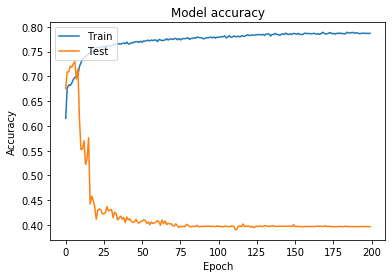

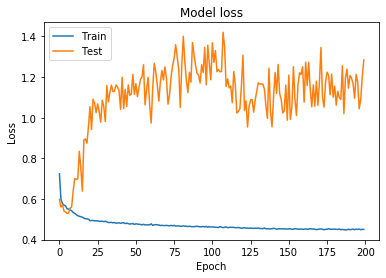

In [45]:
#come back to this; not working right.

import tkinter
import matplotlib


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.savefig("DNgraphacc.png")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.savefig("DNgraphloss.png")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Now, let's try a SVM with different kernels (sigmoid, Gaussian, linear, and polynomial)

#### packages and estimated run times

In [64]:
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.externals.joblib import parallel_backend

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

In [65]:
import time

import psutil


In [66]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import svm
from sklearn import datasets
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

In [67]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [68]:
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df.values, y, test_size=0.20, random_state=102)

## polynomial first

In [72]:
%timeit
poly_svclassifier = SVC(kernel='poly', degree=8)
poly_svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [73]:
y_pred = poly_svclassifier.predict(x_test)

In [74]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19301     0]
 [12682     0]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75     19301
           1       0.00      0.00      0.00     12682

   micro avg       0.60      0.60      0.60     31983
   macro avg       0.30      0.50      0.38     31983
weighted avg       0.36      0.60      0.45     31983



C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gaussian

In [75]:
rbf_svclassifier = SVC(kernel='rbf')
rbf_svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [76]:
y_pred = rbf_svclassifier.predict(x_test)

In [77]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16325  2976]
 [ 5998  6684]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78     19301
           1       0.69      0.53      0.60     12682

   micro avg       0.72      0.72      0.72     31983
   macro avg       0.71      0.69      0.69     31983
weighted avg       0.72      0.72      0.71     31983



# Sigmoid

In [78]:
sig_svclassifier = SVC(kernel='sigmoid')
sig_svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred = sig_svclassifier.predict(x_test)

In [80]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16270  3031]
 [ 6452  6230]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     19301
           1       0.67      0.49      0.57     12682

   micro avg       0.70      0.70      0.70     31983
   macro avg       0.69      0.67      0.67     31983
weighted avg       0.70      0.70      0.69     31983



# Linear

In [69]:
lin_svclassifier = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear')))
lin_svclassifier.fit(x_train, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
          n_jobs=None)

In [70]:
y_pred = lin_svclassifier.predict(x_test)

In [71]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[15973  3328]
 [ 5982  6700]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.77     19301
           1       0.67      0.53      0.59     12682

   micro avg       0.71      0.71      0.71     31983
   macro avg       0.70      0.68      0.68     31983
weighted avg       0.70      0.71      0.70     31983



# Grid Search

In [81]:

def svc_param_selection(X, y):
    Cs = [0.01, 0.1, 1, 10,20,50]
    gammas = [0.01, 0.5, 1]
    kernel = ['rbf','linear','poly']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid,n_jobs = 12)
    with parallel_backend('threading'):
    #would need to add back in ,cv = nfolds after param_grid
        grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(x_train,y_train.ravel())

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_data1_scaled, y_data1, test_size=0.4, random_state=0)
#X_train.shape, y_train.ravel().shape
#X_test.shape, y_test.ravel().shape
clf1 = SVC(kernel='linear', C=1,gamma = 0.01).fit(x_train, y_train)
clf1.score(x_test, y_test)  

In [ ]:


clf2 = SVC(kernel='rbf', C=20,gamma = 0.01)
scores = cross_val_score(clf2,x1.values,y, cv = 30)
scores


In [ ]:
np.mean(scores)

# PCA

In [50]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [51]:
# use x1 and y

x2 = x1.values

y1 = y



In [52]:
x2 = StandardScaler().fit_transform(x2)

In [56]:
pca = PCA(n_components = 65)

principalComponents = pca.fit_transform(x2)

principalDF = pd.DataFrame(data = principalComponents, columns = x1.columns)

In [63]:
finalDf = pd.concat([principalDF, pd.DataFrame(y1)], axis = 1)

In [65]:
finalDf

,x0,x1,x3,x4,x5,x6,x7,x8,x9,x10,...,Month_Sep,Month_Oct,Month_Nov,Month_Dec,DayOfWeek_Mon,DayOfWeek_Tue,DayOfWeek_Wed,DayOfWeek_Thu,DayOfWeek_Fri,0
0,4.379046,0.624907,2.227346,1.774946,-0.187493,1.241519,0.046043,1.656983,-0.732147,1.850093,...,-0.275477,-0.072601,0.000339,0.000380,-0.000158,-0.000392,3.669204e-15,-2.552024e-17,-1.500016e-16,0
1,1.575658,3.283043,-2.064218,-0.970365,0.972914,-0.642204,0.456437,-0.246107,1.905229,-0.066089,...,0.571814,0.043259,0.000013,-0.000290,-0.000185,0.000035,-4.229915e-16,-1.941408e-16,-9.556158e-16,0
2,0.951669,1.084005,0.190444,-0.945720,2.369939,-0.088525,-1.366885,1.664875,-0.726976,-0.019536,...,1.117280,-0.163959,0.000623,-0.000100,-0.000083,-0.000418,7.306031e-16,-3.540314e-16,-7.673709e-17,0
3,-2.618166,-2.461168,0.233044,-1.103991,-0.788925,0.319724,-1.279481,1.721866,-0.669053,0.059957,...,-1.165741,-0.042968,0.000283,0.000020,0.000535,-0.000196,1.972759e-15,-1.009717e-15,-3.975855e-16,0
4,-2.013422,1.267434,1.202208,1.629056,-1.323254,-1.324373,-1.246491,1.649559,-0.873961,1.798711,...,0.264221,0.029321,0.000170,-0.000333,-0.000027,0.000053,-5.702626e-15,-1.236727e-16,7.197501e-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159907,-0.445661,0.733591,1.118293,-0.873287,3.218720,-1.713496,-0.369652,-0.285809,1.856681,-0.111342,...,0.841961,-0.076172,0.000179,0.000127,0.000186,-0.000003,5.475865e-16,-7.880579e-17,-1.021583e-16,1
159908,0.960582,1.851650,-1.750298,-0.993217,0.872833,0.105213,0.711828,-0.219366,0.772353,0.196084,...,0.335795,0.163020,-0.000277,-0.000391,-0.000349,0.000095,-6.192564e-17,-9.396523e-17,1.042928e-17,0
159909,-1.140814,2.580019,0.904758,-1.032198,-0.248829,-1.183320,-0.188326,-1.481145,-1.234396,-0.063180,...,0.167805,0.031031,0.000047,-0.000360,0.000002,-0.000116,1.172425e-17,-2.995754e-18,-2.746667e-17,1
159910,1.254530,-0.783530,-0.493392,-0.915454,2.152851,-0.591829,1.060023,-0.255191,0.861443,0.151285,...,0.407405,-0.101951,-0.000186,0.000130,0.000293,0.000142,8.713496e-16,-3.762101e-16,3.493283e-17,0


In [66]:
pca.explained_variance_ratio_

array([5.37844277e-02, 4.37039468e-02, 3.12479881e-02, 2.72689363e-02,
       2.65733474e-02, 2.62141186e-02, 2.30082765e-02, 2.11480881e-02,
       1.95901296e-02, 1.87587049e-02, 1.82157220e-02, 1.72538146e-02,
       1.68022086e-02, 1.62552248e-02, 1.58002277e-02, 1.57814122e-02,
       1.57533553e-02, 1.57436209e-02, 1.57202197e-02, 1.56693739e-02,
       1.56603491e-02, 1.56211750e-02, 1.56064245e-02, 1.55901399e-02,
       1.55691264e-02, 1.55619628e-02, 1.55208407e-02, 1.55119535e-02,
       1.54837480e-02, 1.54717925e-02, 1.54587041e-02, 1.54305838e-02,
       1.54122754e-02, 1.53956228e-02, 1.53737222e-02, 1.53563640e-02,
       1.53101437e-02, 1.52967015e-02, 1.52713539e-02, 1.52548729e-02,
       1.52341654e-02, 1.52062228e-02, 1.51992616e-02, 1.51896490e-02,
       1.51630441e-02, 1.51458263e-02, 1.51241763e-02, 1.50867612e-02,
       1.50740065e-02, 1.50347787e-02, 1.50014812e-02, 1.49443710e-02,
       1.38823895e-02, 1.27226152e-02, 1.16855064e-02, 1.00609767e-02,
      

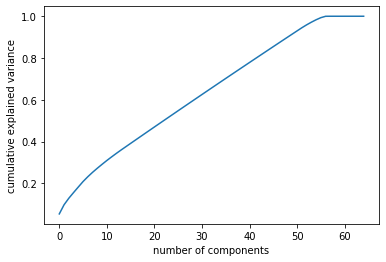

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Other Feature Extraction

In [69]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(scaled_train_df, y1)

In [72]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(scaled_train_df)
# Summarize selected features
print(features[0:5,:])

[8.539e-03 4.188e-02 1.048e-02 1.680e-03 3.995e-03 1.008e+01 5.741e-01
 1.673e-01 4.167e-02 5.239e-02 2.019e-03 4.626e+01 1.773e-02 5.913e-03
 1.036e-02 6.076e-02 6.497e-02 2.931e-02 1.131e-02 2.145e+02 3.448e-02
 1.172e-04 2.366e+02 1.022e-02 1.732e-02 5.326e-02 3.333e-03 7.381e-03
 1.167e-01 1.222e-02 9.781e-02 1.860e-02 6.116e-03 9.864e+00 2.359e-02
 1.464e+02 5.192e+01 4.926e+01 3.456e-04 7.259e-05 3.410e-02 5.325e+00
 1.279e-04 4.730e-02 2.067e+02 2.821e+01 3.964e+02 2.547e+01 1.726e-01
 1.400e-01 1.608e-01 6.382e-01 1.010e+00 2.256e-02 7.031e-01 1.744e-02
 9.773e-02 7.829e-01 1.552e+00 5.683e-01 5.359e-03 1.902e-01 7.804e-01
 1.227e+00 5.066e-01]
[[0.455 0.561 0.435 0.   ]
 [0.383 0.617 0.622 0.   ]
 [0.521 0.49  0.437 0.   ]
 [0.525 0.441 0.438 0.   ]
 [0.324 0.405 0.614 0.   ]]
